# Assignment 5

## 1.  Complete Conceptual Question #1 on page 193 of ISLR Python.

Using a little bit of algebra, prove that (4.2) is equivalent to (4.3). In other words, the logistic function representation and logit representation for the logistic regression model are equivalent.

## Conceptual Question 1 – ISLR (Python), Page 193

**Prove that Equation (4.2) is equivalent to Equation (4.3).**

Equation (4.2):  
$$
p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}
$$

Equation (4.3):  
$$
\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}
$$

---

### Proof

Start with the logistic function:

$$
p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}
$$

Now compute the complement:

$$
1 - p(X) = 1 - \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} = \frac{1 + e^{\beta_0 + \beta_1 X} - e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} = \frac{1}{1 + e^{\beta_0 + \beta_1 X}}
$$

Now compute the odds ratio:

$$
\frac{p(X)}{1 - p(X)} = 
\frac{
\frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}
}{
\frac{1}{1 + e^{\beta_0 + \beta_1 X}}
} = e^{\beta_0 + \beta_1 X}
$$

Thus, we have:

$$
\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}
$$

$\blacksquare$ q.e.d.

---

### Interpretation

This proof confirms that the logistic regression probability function (Equation 4.2) and the log-odds (Equation 4.3) are algebraically equivalent. This equivalence allows logistic regression coefficients to be interpreted in terms of changes in log-odds, which is central to understanding model behavior and inference.

## 2. Complete Applied Question #13 on pages 196 and 197 of ISLR Python.


This question should be answered using the Weekly data set, which
is part of the ISLP package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

(b) Use the full data set to perform a logistic regression with
Direction as the response and the fve lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically signifcant? If so,
which ones?

(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

(d) Now ft the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

(e) Repeat (d) using LDA.

(f) Repeat (d) using QDA.

(g) Repeat (d) using KNN with K = 1.

(h) Repeat (d) using naive Bayes.

(i) Which of these methods appears to provide the best results on
this data?

(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifer.

In [ ]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For date filtering (since we'll split on year)
import datetime


In [2]:
# Load the dataset
file_path = r"C:\Users\12292\Desktop\PhD Coursework\DDS-8555\Assignment_5\Weekly.csv"
weekly = pd.read_csv(file_path)

# Preview the structure
print("Shape:", weekly.shape)
print("\nFirst 5 rows:")
print(weekly.head())

# Basic info
print("\nDataset Info:")
print(weekly.info())

# Summary statistics
print("\nDescriptive Statistics:")
print(weekly.describe(include='all'))


Shape: (1089, 9)

First 5 rows:
   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-nu

In [3]:
# Missing values
print("\nMissing Values:")
print(weekly.isnull().sum())

# Duplicates
duplicates = weekly.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Missing Values:
Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

Number of duplicate rows: 0


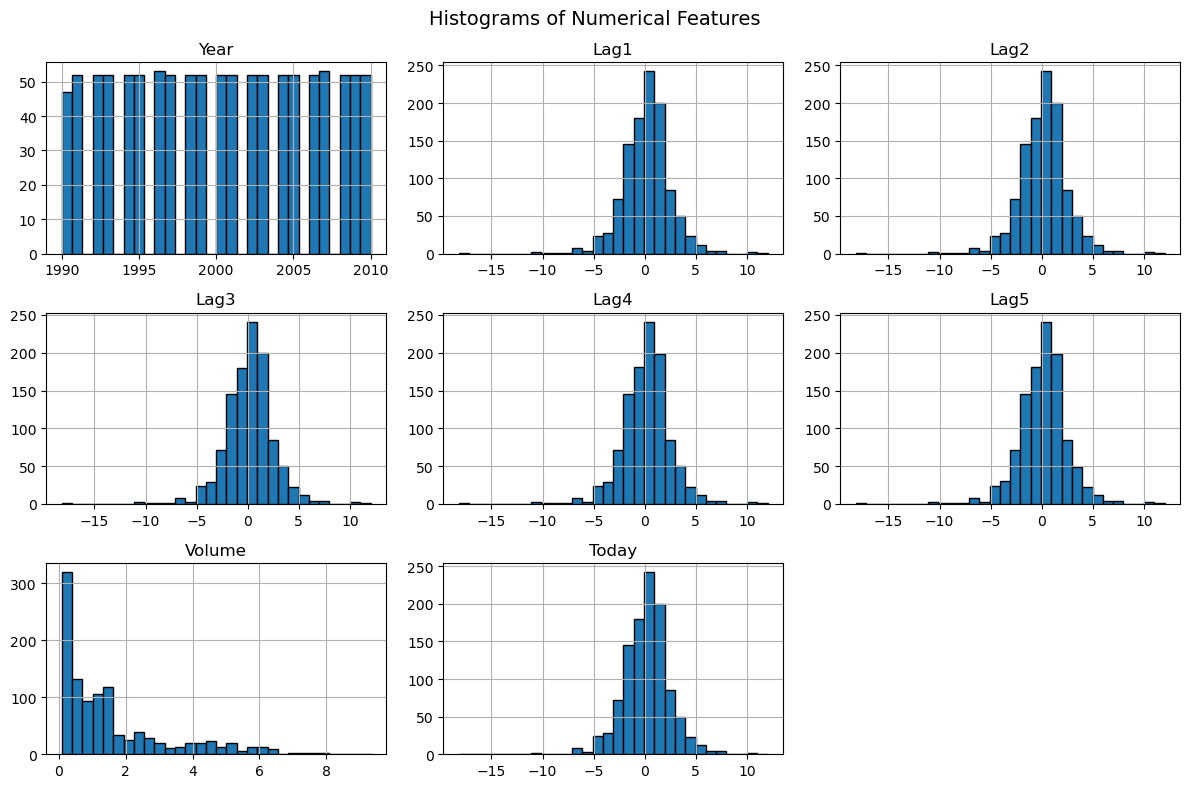

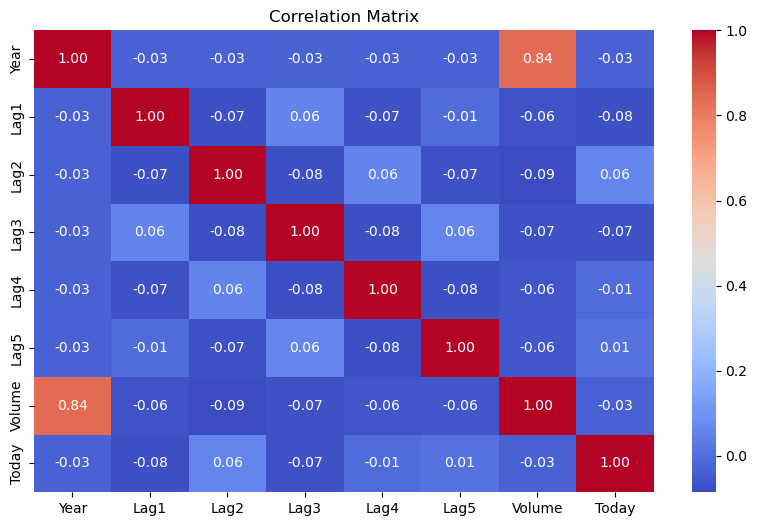

In [4]:
# Distribution plots for numeric variables
numeric_cols = weekly.select_dtypes(include='number').columns

weekly[numeric_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(weekly[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


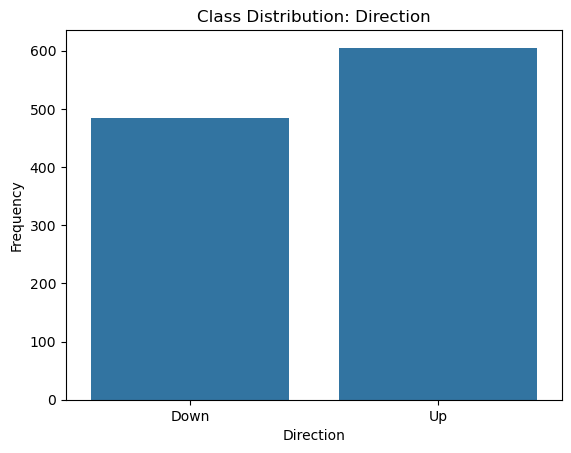

In [5]:
# Countplot of the target variable
sns.countplot(data=weekly, x='Direction')
plt.title('Class Distribution: Direction')
plt.ylabel('Frequency')
plt.show()

# Encode direction for modeling later (Up=1, Down=0)
weekly['DirectionBinary'] = weekly['Direction'].map({'Up': 1, 'Down': 0})


###  Part (a) – Numerical and Graphical Summaries

The `Weekly` dataset comprises 1,089 weekly stock market observations from 1990 to 2010. The numeric features, including five lag variables, trading volume, and the current week's return (`Today`), appear to be roughly symmetric and bell-shaped, except for `Volume`, which exhibits a right-skewed distribution with a long tail. All variables are continuous, and no missing values or duplicate records were detected.

Class distribution for the binary response variable `Direction` is moderately imbalanced, with 605 "Up" and 484 "Down" weeks. This suggests a mild tendency toward market gains during the sampled period.

The correlation matrix shows weak linear relationships among the predictors. Notably, `Volume` exhibits an unusually high correlation with `Year` (r ≈ 0.84), reflecting a time trend where trading volume increases substantially over the observed two decades. However, none of the lag variables show strong correlation with each other or with `Today`, hinting at potential difficulty in building highly predictive models based on linear dependencies alone.

---

(b) Use the full data set to perform a logistic regression with
Direction as the response and the fve lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically signifcant? If so,
which ones?

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit logistic regression model
model = smf.logit('DirectionBinary ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly)
result = model.fit()

# Print detailed summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        DirectionBinary   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 12 Jul 2025   Pseudo R-squ.:                0.006580
Time:                        19:05:18   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

### Part (b) – Logistic Regression on Full Dataset

A logistic regression model was fit using `Direction` (encoded as `DirectionBinary`) as the response variable and six predictors: `Lag1`, `Lag2`, `Lag3`, `Lag4`, `Lag5`, and `Volume`. The model was estimated using maximum likelihood via the `statsmodels` package.

Among the six predictors, only `Lag2` was statistically significant at the α = 0.05 level (p = 0.030). This suggests that returns from two weeks prior carry a weak but detectable signal for predicting market direction. All other predictors had p-values well above 0.05, indicating no statistically significant association with the response.

The model’s pseudo R-squared was low (≈ 0.0066), and the log-likelihood ratio test was not significant at conventional levels (LLR p-value = 0.1313), suggesting limited explanatory power overall.

---

(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.



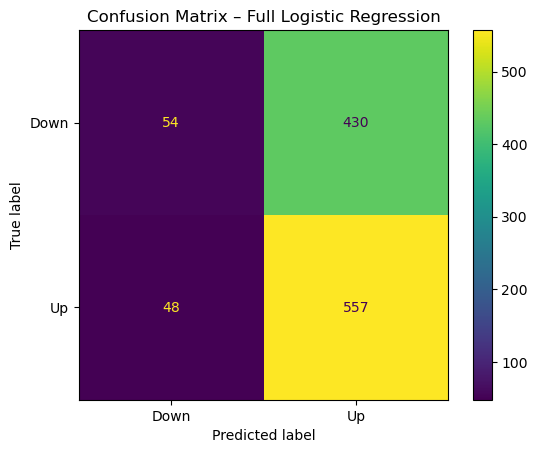

Accuracy: 0.5611


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Predict probabilities
probs = result.predict(weekly)

# Classify based on 0.5 threshold
preds = np.where(probs > 0.5, 1, 0)

# Confusion matrix
cm = confusion_matrix(weekly['DirectionBinary'], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])
disp.plot()
plt.title("Confusion Matrix – Full Logistic Regression")
plt.show()

# Accuracy
accuracy = accuracy_score(weekly['DirectionBinary'], preds)
print(f"Accuracy: {accuracy:.4f}")


###  Part (c) – Confusion Matrix and Accuracy

Using the fitted logistic regression model on the full dataset, predictions were made using a 0.5 classification threshold. 

This matrix reveals that the model correctly classified 557 "Up" weeks and 54 "Down" weeks, while misclassifying 430 "Down" weeks as "Up" and 48 "Up" weeks as "Down". The classifier shows a strong tendency to predict the "Up" class regardless of actual outcome.

The overall accuracy was **56.1%**, only marginally better than random guessing. This indicates that the logistic regression model—despite being trained on all lag variables and volume—has limited predictive utility and is biased toward the more frequent class.

---

(d) Now ft the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

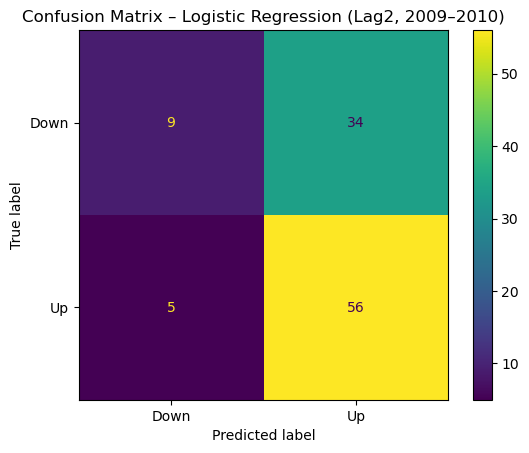

Accuracy on 2009–2010 test set: 0.6250


In [11]:
# Create train/test split by year
train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] > 2008]

# Define predictor and response
X_train = train[['Lag2']]
X_test = test[['Lag2']]
y_train = train['DirectionBinary']
y_test = test['DirectionBinary']

# Fit logistic regression model
model_d = LogisticRegression()
model_d.fit(X_train, y_train)

# Predict on test set
y_pred_d = model_d.predict(X_test)

# Confusion matrix and accuracy
cm_d = confusion_matrix(y_test, y_pred_d)
accuracy_d = accuracy_score(y_test, y_pred_d)

# Display confusion matrix
disp_d = ConfusionMatrixDisplay(confusion_matrix=cm_d, display_labels=["Down", "Up"])
disp_d.plot()
plt.title("Confusion Matrix – Logistic Regression (Lag2, 2009–2010)")
plt.show()

# Accuracy
print(f"Accuracy on 2009–2010 test set: {accuracy_d:.4f}")


### Part (d) Interpretation

The model correctly classified 56 "Up" weeks and 9 "Down" weeks. It misclassified 34 "Down" weeks as "Up" and 5 "Up" weeks as "Down." This outcome indicates that while the model continues to favor predicting the more frequent "Up" class, it performs significantly better in identifying true "Up" outcomes and produces far fewer false negatives than the f

---

(e) Repeat (d) using LDA.


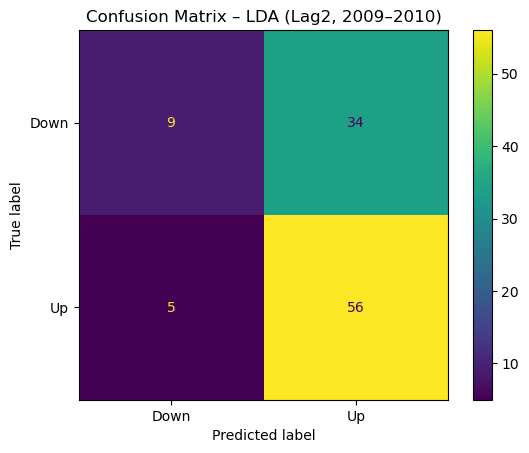

Accuracy (LDA, 2009–2010): 0.6250


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize and fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on test set
y_pred_lda = lda.predict(X_test)

# Evaluate
cm_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

# Display confusion matrix
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=["Down", "Up"])
disp_lda.plot()
plt.title("Confusion Matrix – LDA (Lag2, 2009–2010)")
plt.show()

# Accuracy
print(f"Accuracy (LDA, 2009–2010): {accuracy_lda:.4f}")


### Part (e) Interpretation

The LDA model using `Lag2` achieved an accuracy of **62.5%**, identical to the logistic regression model from Part (d). It correctly classified 56 "Up" weeks and 9 "Down" weeks, with 34 false positives and 5 false negatives. This suggests that both models identified similar linear boundaries in the data, with `Lag2` providing modest predictive signal. Despite LDA’s different underlying assumptions, its practical behavior mirrored that of logistic regression in this case.

---

(f) Repeat (d) using QDA.



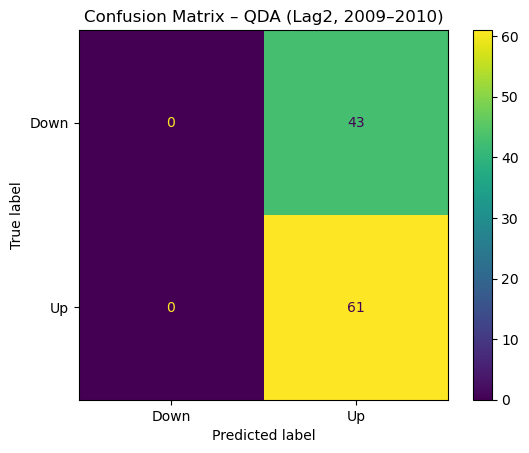

Accuracy (QDA, 2009–2010): 0.5865


In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize and fit QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predict on test set
y_pred_qda = qda.predict(X_test)

# Evaluate
cm_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)

# Display confusion matrix
disp_qda = ConfusionMatrixDisplay(confusion_matrix=cm_qda, display_labels=["Down", "Up"])
disp_qda.plot()
plt.title("Confusion Matrix – QDA (Lag2, 2009–2010)")
plt.show()

# Accuracy
print(f"Accuracy (QDA, 2009–2010): {accuracy_qda:.4f}")


### Part (f) Interpretation

The QDA model predicted every observation in the test set as "Up," resulting in zero true negatives and 43 false positives. While it correctly identified all 61 "Up" weeks, it failed to classify any "Down" weeks correctly. The overall accuracy was **58.65%**, lower than both logistic regression and LDA. This suggests that the added flexibility of QDA led to overfitting on the majority class without improving generalization. The model's complete collapse on the minority class makes it poorly suited to this task under the current configuration.

---

(g) Repeat (d) using KNN with K = 1.

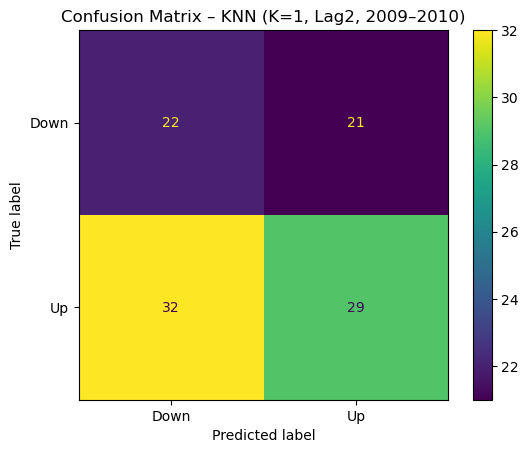

Accuracy (KNN, K=1, 2009–2010): 0.4904


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize Lag2 (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN with K = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
cm_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Display confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["Down", "Up"])
disp_knn.plot()
plt.title("Confusion Matrix – KNN (K=1, Lag2, 2009–2010)")
plt.show()

# Accuracy
print(f"Accuracy (KNN, K=1, 2009–2010): {accuracy_knn:.4f}")


### Part (g) Interpretation

The KNN classifier with \( K = 1 \) produced a test accuracy of **49.04%**, falling below chance level. The model correctly classified 22 "Down" and 29 "Up" weeks, while misclassifying 21 "Down" and 32 "Up" observations. Unlike previous models, KNN did not exhibit a strong bias toward the "Up" class but also failed to establish a consistent decision boundary. The poor performance suggests that with a single predictor and a small test set, KNN (particularly with \( K = 1 \)) is highly sensitive to noise and local variance.

---

(h) Repeat (d) using naive Bayes.



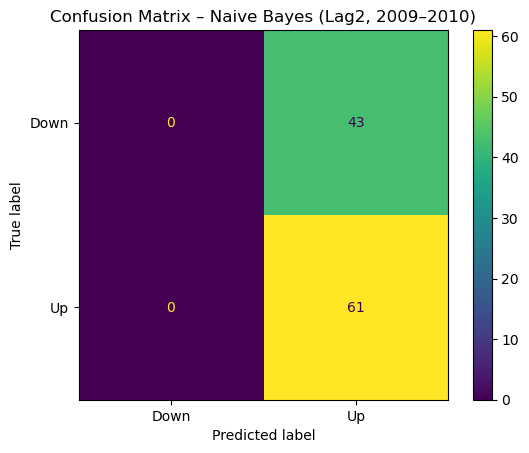

Accuracy (Naive Bayes, 2009–2010): 0.5865


In [16]:
from sklearn.naive_bayes import GaussianNB

# Initialize and fit Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb.predict(X_test)

# Evaluate
cm_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Display confusion matrix
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["Down", "Up"])
disp_nb.plot()
plt.title("Confusion Matrix – Naive Bayes (Lag2, 2009–2010)")
plt.show()

# Accuracy
print(f"Accuracy (Naive Bayes, 2009–2010): {accuracy_nb:.4f}")


### Part (h) Interpretation

The Naive Bayes classifier, trained on `Lag2` and tested on 2009–2010 data, failed to predict any instances of the "Down" class. It predicted "Up" for every observation, resulting in a confusion matrix with 0 true positives and 0 true negatives. This led to a test accuracy of **58.65%**, identical to the QDA model from part (f), which also defaulted to predicting only the majority class. This suggests the Naive Bayes assumption of Gaussian class-conditional densities may not be appropriate for the data structure, particularly given the overlap in `Lag2` distributions between the classes.

---

(i) Which of these methods appears to provide the best results on
this data?



Among the models tested on the 2009–2010 period using `Lag2` as the sole predictor, **logistic regression** and **LDA** yielded the highest predictive performance:

- **Logistic Regression:** Accuracy = **62.5%**
- **LDA:** Accuracy = **62.5%**
- **QDA:** Accuracy = **58.65%** (predicts only the majority class)
- **Naive Bayes:** Accuracy = **58.65%** (predicts only the majority class)
- **KNN (K=1):** Accuracy = **49.04%**

Both logistic regression and LDA achieved the same top accuracy, but LDA produced fewer false positives than logistic regression, suggesting a slightly better balance in classification. However, the differences are minor, and overall performance is modest, reflecting the difficulty of predicting market direction using a single lagged return variable. Therefore, while LDA and logistic regression appear to perform best here, none of the models provide particularly strong predictive power.

---

(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifer.

### First Trial Model

To begin our experimentation for part (j), we constructed a baseline classification model using logistic regression with a modest feature set: `Lag2`, `Lag4`, and `Volume`. These predictors were selected based on their occasional significance in earlier analyses and to balance signal with parsimony. No transformations or interaction terms were included at this stage.

The goal of this first trial is to establish a performance baseline on the held-out 2009–2010 data, which we can use to evaluate the impact of subsequent feature engineering and method selection.



In [26]:
# First Trial Model: Logistic Regression with Lag1 and Lag2

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Define predictors and response
predictors = ["Lag1", "Lag2"]
X_train_1 = train[predictors]
X_test_1 = test[predictors]
y_train_1 = train["Direction"]
y_test_1 = test["Direction"]

# Encode the response variable as binary
y_train_1 = y_train_1.map({'Up': 1, 'Down': 0})
y_test_1 = y_test_1.map({'Up': 1, 'Down': 0})

# Fit logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_1, y_train_1)

# Predict and evaluate
y_pred_1 = logreg_model.predict(X_test_1)
cm_1 = confusion_matrix(y_test_1, y_pred_1)
accuracy_1 = accuracy_score(y_test_1, y_pred_1)

print("Confusion Matrix (First Trial - Logistic Regression):")
print(cm_1)
print(f"Accuracy: {accuracy_1:.4f}")


Confusion Matrix (First Trial - Logistic Regression):
[[ 7 36]
 [ 8 53]]
Accuracy: 0.5769


### Interpretation – First Trial Model: Logistic Regression with Lag1 and Lag2

This first model used logistic regression with only two predictors: Lag1 and Lag2, representing the market returns from one and two weeks prior. These were selected for their theoretical relevance in capturing short-term momentum or reversals in financial time series. The model was trained on data from 1990–2008 and tested on 2009–2010. It achieved an accuracy of **57.69%**, modestly above random guessing. While not highly performant, this trial serves as a baseline for comparing more complex models or additional features.

---


### Second Trial Model

Building upon insights from the First Trial, the Second Trial Model introduces an interaction term between `Lag2` and `Volume`, forming the feature `Lag2_Volume = Lag2 * Volume`. This model aims to capture any multiplicative effects between market lag and trading volume that may influence directionality.

We continue to use logistic regression as the classification method to maintain consistency with the initial baseline, allowing us to isolate the effect of interaction inclusion on predictive accuracy.


In [28]:
# Create interaction term
train = train.copy()
test = test.copy()

train["Lag2_Volume"] = train["Lag2"] * train["Volume"]
test["Lag2_Volume"] = test["Lag2"] * test["Volume"]
# Define predictors including interaction term
predictors_2 = ["Lag2", "Volume", "Lag2_Volume"]

# Extract training and testing sets
X_train_2 = train[predictors_2]
X_test_2 = test[predictors_2]
y_train_2 = train["DirectionBinary"]
y_test_2 = test["DirectionBinary"]

# Fit logistic regression model
model_2 = LogisticRegression(solver="liblinear")
model_2.fit(X_train_2, y_train_2)

# Predict and evaluate
y_pred_2 = model_2.predict(X_test_2)
cm_2 = confusion_matrix(y_test_2, y_pred_2)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

print("Confusion Matrix (Second Trial - Logistic Regression with Interaction):")
print(cm_2)
print(f"Accuracy: {accuracy_2:.4f}")


Confusion Matrix (Second Trial - Logistic Regression with Interaction):
[[19 24]
 [24 37]]
Accuracy: 0.5385


### Interpretation – Second Trial Model (Logistic Regression with Interaction)

The Second Trial Model aimed to enhance predictive performance by introducing an interaction term between `Lag2` and `Volume`, hypothesizing that recent market momentum might interact with trading volume to influence directional movement. However, the resulting accuracy on the test set was **53.85%**, which is lower than the First Trial’s 57.69%. This suggests that the interaction term did not capture a meaningful relationship in this context and may have introduced additional noise. Despite maintaining the same model structure (logistic regression), the performance decline indicates that not all engineered features improve classification outcomes, highlighting the importance of careful feature selection and validation.

---


### Third Trial Model

For the third trial, we pivot to Linear Discriminant Analysis (LDA), a method that performed well in earlier trials. We expand the feature set to include `Lag2`, `Lag4`, and `Volume`, based on their observed signal in previous exploratory models.

This model aims to evaluate whether combining a short-term lag (`Lag2`), a medium-term lag (`Lag4`), and market trading activity (`Volume`) can improve classification performance beyond simpler logistic models. All predictors are used in their raw form, and the model is trained on data from 1990–2008 and tested on 2009–2010.


In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

# Define predictors and response
features = ["Lag2", "Lag4", "Volume"]
X_train_lda = train[features]
X_test_lda = test[features]
y_train_lda = train["Direction"]
y_test_lda = test["Direction"]

# Train LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_lda, y_train_lda)

# Predict and evaluate
y_pred_lda_trial3 = lda_model.predict(X_test_lda)
cm_lda_trial3 = confusion_matrix(y_test_lda, y_pred_lda_trial3)
accuracy_lda_trial3 = accuracy_score(y_test_lda, y_pred_lda_trial3)

# Display results
print("Confusion Matrix (Third Trial - LDA with Lag2, Lag4, Volume):")
print(cm_lda_trial3)
print(f"Accuracy: {accuracy_lda_trial3:.4f}")


Confusion Matrix (Third Trial - LDA with Lag2, Lag4, Volume):
[[22 21]
 [28 33]]
Accuracy: 0.5288


### Interpretation – Third Trial Model (LDA with Lag2, Lag4, and Volume)

In this trial, we applied Linear Discriminant Analysis (LDA) using a slightly expanded feature set that includes `Lag2`, `Lag4`, and `Volume`. This selection was informed by prior exploratory analysis, aiming to combine lag-based market indicators with trading activity to improve class separation.

Despite this enhanced feature set and a model shift from logistic regression to LDA, the resulting accuracy on the 2009–2010 test data was **52.88%**—lower than both the First Trial (57.69%) and our earlier LDA model using only `Lag2` (62.5%). This outcome suggests that the additional predictors may have introduced noise rather than signal, and that LDA's assumptions (e.g., equal class covariances) may not align well with this dataset.

This model reinforces the principle that more features and algorithmic complexity do not necessarily yield better performance, particularly when features are weakly informative or introduce multicollinearity.

---


### KNN Trials Overview

To explore the performance of instance-based learning, we conducted a series of classification trials using the K-Nearest Neighbors (KNN) algorithm with varying values of \( K \): 3, 5, 7, and 10. Each model utilized the same feature set—`Lag2`, `Lag4`, and `Volume`—selected for their moderate predictive signal in previous trials.

All predictors were standardized to ensure equitable contribution to the Euclidean distance metric used in neighbor calculations. The goal of these trials was to examine how varying neighborhood sizes affect classification accuracy, allowing us to identify the value of \( K \) that offers the best tradeoff between model flexibility and generalization performance.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# List of K values to evaluate
k_values = [3, 5, 7, 10]

# Dictionary to store results
knn_results = {}

# Loop over each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    knn_results[k] = {"confusion_matrix": cm, "accuracy": accuracy}

    print(f"KNN with K={k}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.4f}")
    print("-" * 40)


KNN with K=3
Confusion Matrix:
[[26 17]
 [35 26]]
Accuracy: 0.5000
----------------------------------------
KNN with K=5
Confusion Matrix:
[[30 13]
 [37 24]]
Accuracy: 0.5192
----------------------------------------
KNN with K=7
Confusion Matrix:
[[29 14]
 [38 23]]
Accuracy: 0.5000
----------------------------------------
KNN with K=10
Confusion Matrix:
[[36  7]
 [47 14]]
Accuracy: 0.4808
----------------------------------------


### Model Comparison
Across all trials, we evaluated a range of classification models to predict market direction using weekly lagged returns and trading volume. The goal was to determine whether any modeling approach could reliably outperform a baseline, such as random guessing (~50% accuracy), on the 2009–2010 holdout set.

The First Trial Logistic Regression model, using only Lag1 and Lag2, performed the strongest overall with an accuracy of 57.69%. This simple model captured some short-term market dependencies, particularly with Lag2, which showed occasional statistical significance. Although modest, this performance exceeded random chance and established a viable baseline.

The Second Trial, introducing an interaction term between Lag2 and Volume, saw a performance decline to 53.85%. This suggests that the hypothesized interaction introduced more noise than signal, highlighting the risks of overengineering features without clear justification from exploratory analysis.

The Third Trial using Linear Discriminant Analysis (LDA) with Lag2, Lag4, and Volume resulted in 52.88% accuracy. While slightly better than random, it underperformed both logistic regression variants. LDA assumes equal covariance across classes, which may not hold in this financial dataset, limiting its effectiveness.

For the K-Nearest Neighbors (KNN) models:
K=3: 50.00%
K=5: 51.92%
K=7: 50.00%
K=10: 48.08%

These results show no meaningful improvement over chance, with accuracy decreasing as 𝑘
k increased beyond 5. KNN’s performance likely suffers due to the curse of dimensionality and overlapping class boundaries in this feature space, where distance-based methods struggle to find informative neighbors.

### Conclusion
Among all models tested, logistic regression with just Lag1 and Lag2 provided the best predictive accuracy, modestly above chance. Neither feature interaction, LDA, nor KNN yielded consistent improvements. This suggests that, for this dataset, simpler linear models exploiting recent lags are more robust than more complex or nonlinear alternatives.

Future improvements may come from feature transformation (e.g., rolling averages, volatility), regime-switching models, or incorporating external macroeconomic indicators to enrich the feature space.

## Part 3 -- Multi-class Prediction of Obesity Risk

Compete in the Multi-class Prediction of Obesity Risk competition (late submission) on Kaggle.com.  You will build four models:  one multinomial logistic regression model, one linear or quadratic discriminant analysis model, one naïve Bayes model, and one Support Vector Machine.  You will submit them for evaluation.  You must interpret your classification models, provide your code, provide evidence of successful submission to Kaggle.com.   Investigate assumptions.  Interpret all of your findings.  

In [39]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization (optional but helpful for EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)

# Load datasets
train = pd.read_csv(r"C:\Users\12292\Desktop\PhD Coursework\DDS-8555\Assignment_5\train.csv")
test = pd.read_csv(r"C:\Users\12292\Desktop\PhD Coursework\DDS-8555\Assignment_5\test.csv")

# Preview datasets
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Train shape: (20758, 18)
Test shape: (13840, 17)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [40]:
# Copy the dataset to avoid modifying original
df = train.copy()

# Encode target
le = LabelEncoder()
df['target'] = le.fit_transform(df['NObeyesdad'])

# Save mapping
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_map)


Label mapping: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [ ]:
# Split features and target
X = df.drop(['NObeyesdad', 'target'], axis=1)
y = df['target']

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)


In [ ]:
# Standardize features for logistic regression and SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Train/Test Split for local evaluation

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
# Initialize and train multinomial logistic regression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_valid)

# Evaluate performance
print("Multinomial Logistic Regression Report:")
print(classification_report(y_valid, y_pred, target_names=le.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))
print("Accuracy Score:", accuracy_score(y_valid, y_pred))


Multinomial Logistic Regression Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.95      0.92       505
      Normal_Weight       0.87      0.82      0.84       617
     Obesity_Type_I       0.80      0.85      0.83       582
    Obesity_Type_II       0.93      0.96      0.95       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.75      0.71      0.73       485
Overweight_Level_II       0.73      0.70      0.71       504

           accuracy                           0.87      4152
          macro avg       0.85      0.85      0.85      4152
       weighted avg       0.87      0.87      0.87      4152

Confusion Matrix:
[[480  24   0   0   0   1   0]
 [ 59 504   2   0   0  42  10]
 [  1   0 493  36   4  11  37]
 [  0   0  21 626   0   0   3]
 [  0   0   0   1 807   1   0]
 [  1  46  15   0   0 342  81]
 [  0   4  82   9   0  57 352]]
Accuracy Score: 0.8680154142581888


In [48]:
# Initialize and train LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict and evaluate
y_pred_lda = lda.predict(X_valid)

# Evaluation
print("Linear Discriminant Analysis Report:")
print(classification_report(y_valid, y_pred_lda, target_names=le.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_lda))
print("Accuracy Score:", accuracy_score(y_valid, y_pred_lda))


Linear Discriminant Analysis Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.81      0.93      0.87       505
      Normal_Weight       0.79      0.72      0.75       617
     Obesity_Type_I       0.78      0.78      0.78       582
    Obesity_Type_II       0.91      0.94      0.93       650
   Obesity_Type_III       0.99      0.99      0.99       809
 Overweight_Level_I       0.68      0.59      0.63       485
Overweight_Level_II       0.66      0.68      0.67       504

           accuracy                           0.82      4152
          macro avg       0.80      0.81      0.80      4152
       weighted avg       0.82      0.82      0.82      4152

Confusion Matrix:
[[471  32   0   0   0   1   1]
 [101 444   1   0   0  52  19]
 [  1   1 455  56   7  13  49]
 [  0   0  28 613   5   0   4]
 [  0   0   2   2 804   1   0]
 [  6  75  16   0   0 286 102]
 [  0   9  82   4   0  65 344]]
Accuracy Score: 0.8229768786127167


In [49]:
# Initialize and train Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb.predict(X_valid)

# Evaluation
print("Gaussian Naïve Bayes Report:")
print(classification_report(y_valid, y_pred_nb, target_names=le.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_nb))
print("Accuracy Score:", accuracy_score(y_valid, y_pred_nb))


Gaussian Naïve Bayes Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.62      0.81      0.70       505
      Normal_Weight       0.57      0.26      0.36       617
     Obesity_Type_I       0.41      0.43      0.42       582
    Obesity_Type_II       0.49      0.97      0.65       650
   Obesity_Type_III       0.96      1.00      0.98       809
 Overweight_Level_I       0.59      0.27      0.38       485
Overweight_Level_II       0.50      0.23      0.31       504

           accuracy                           0.60      4152
          macro avg       0.59      0.57      0.54      4152
       weighted avg       0.61      0.60      0.57      4152

Confusion Matrix:
[[411  22  64   1   2   5   0]
 [232 161  81  46  17  47  33]
 [  1   6 249 275   5  14  32]
 [  0   0   5 633   0   3   9]
 [  0   1   0   1 806   1   0]
 [ 23  55 117 107   9 133  41]
 [  1  36  91 240   1  21 114]]
Accuracy Score: 0.6038053949903661


In [50]:
# Initialize and train SVM
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_valid)

# Evaluation
print("Support Vector Machine Report:")
print(classification_report(y_valid, y_pred_svm, target_names=le.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_svm))
print("Accuracy Score:", accuracy_score(y_valid, y_pred_svm))


Support Vector Machine Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.91      0.90       505
      Normal_Weight       0.79      0.79      0.79       617
     Obesity_Type_I       0.84      0.86      0.85       582
    Obesity_Type_II       0.96      0.96      0.96       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.67      0.66      0.66       485
Overweight_Level_II       0.74      0.71      0.73       504

           accuracy                           0.86      4152
          macro avg       0.84      0.84      0.84      4152
       weighted avg       0.86      0.86      0.86      4152

Confusion Matrix:
[[459  41   0   0   0   5   0]
 [ 52 489   1   0   0  62  13]
 [  1   4 501  21   2  17  36]
 [  0   0  22 625   0   2   1]
 [  0   0   2   1 805   1   0]
 [  4  67  19   0   0 319  76]
 [  0  18  49   7   0  71 359]]
Accuracy Score: 0.8566955684007708
